In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/train.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Data Description:
        battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...  

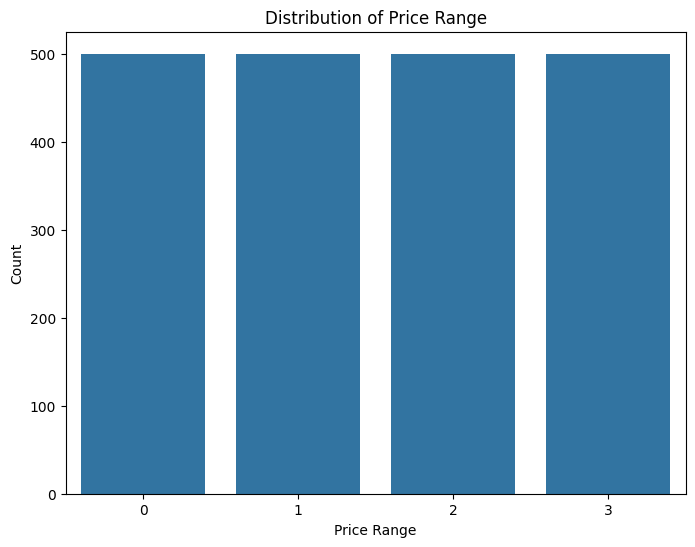

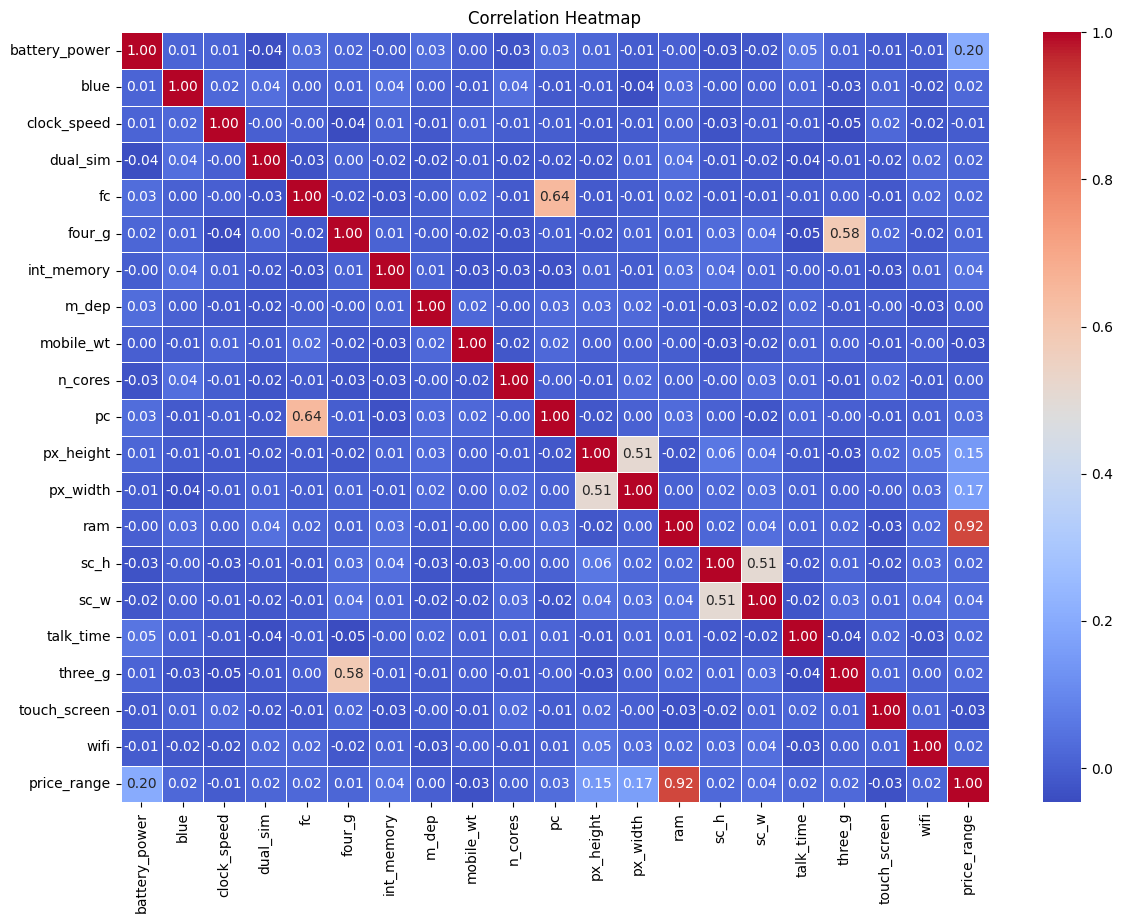

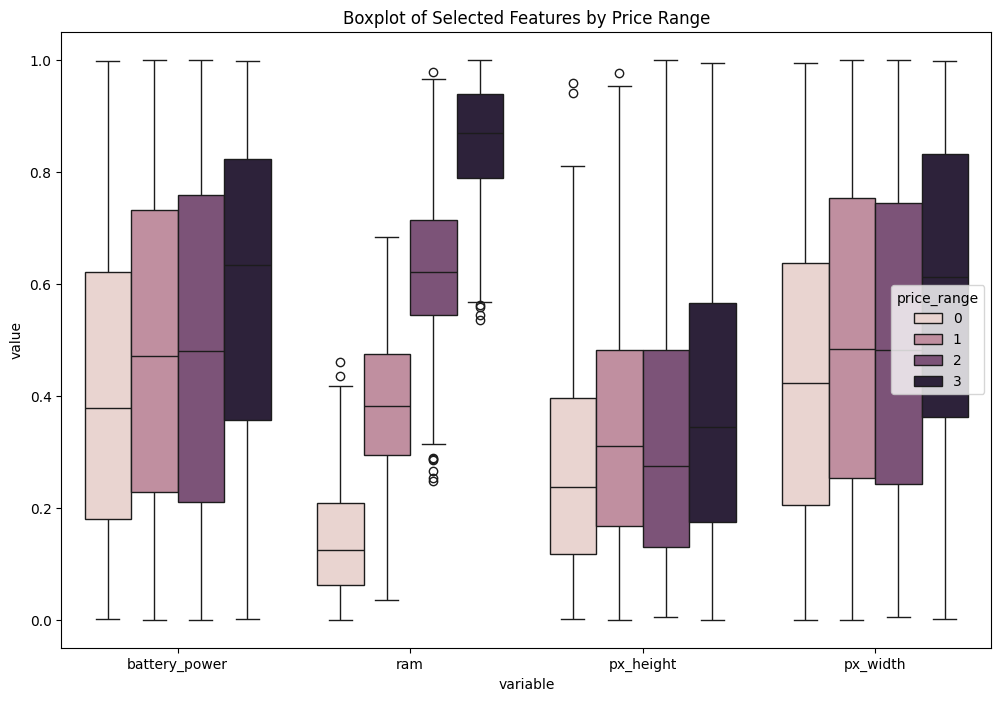

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Mount the data set
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Define the target variable and features
target_variable = 'price_range'
features = data.columns.drop(target_variable)

# Display basic statistics of the dataset
print("Data Description:\n", data.describe())

# Display the data types of each column
print("\nData Types:\n", data.dtypes)

# Display the shape of the dataset
print("\nData Shape:\n", data.shape)

# Check for null values in the dataset
null_values = data.isnull().sum()
print("\nNull Values:\n", null_values)

# Fill any missing values with 0
data_filled = data.fillna(0)

# Scale the feature data using MinMaxScaler
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Plot the distribution of the target variable 'price_range'
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=data)
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Plot boxplots of selected features grouped by 'price_range'
plt.figure(figsize=(12, 8))
selected_features = ['battery_power', 'ram', 'px_height', 'px_width']
data_melted = pd.melt(data, id_vars=target_variable, value_vars=selected_features)
sns.boxplot(x='variable', y='value', hue=target_variable, data=data_melted)
plt.title("Boxplot of Selected Features by Price Range")
plt.show()
